In [74]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

In [85]:
data=pd.read_csv('Reviews2.csv')
data=data.head(20000)

In [87]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [90]:
data=data[(['Score']+['Summary']+['Text'])]

In [91]:
data.head(3)

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...


# Text processing: nltk

In [78]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist

In [79]:
text=[]
summary=[]

for i in data.Text:
    text.append(i)
    
for i in data.Summary:
    summary.append(i)

In [80]:
tokens1=nltk.word_tokenize(str(text))
tokens2=nltk.word_tokenize(str(summary))

In [81]:
stopw=stopwords.words('english')
text1=[w for w in tokens1 if w.isalpha() if w not in stopw]
summary1=[w for w in tokens2 if w.isalpha() if w not in stopw]

In [82]:
porter=nltk.PorterStemmer()
stem1=[porter.stem(w) for w in text1]
stem2=[porter.stem(w) for w in summary1]

freq1=FreqDist(stem1)
freq2=FreqDist(stem2)

sorted_freq1=sorted(freq1.items(),key=lambda k:k[1], reverse=True)
sorted_freq2=sorted(freq2.items(),key=lambda k:k[1], reverse=True)
sorted_freq1

[('I', 54408),
 ('br', 22349),
 ('like', 9959),
 ('tast', 9060),
 ('the', 7805),
 ('flavor', 7506),
 ('coffe', 7170),
 ('good', 7094),
 ('one', 6360),
 ('It', 6250),
 ('love', 6162),
 ('product', 6122),
 ('use', 5969),
 ('tri', 5964),
 ('great', 5633),
 ('would', 4786),
 ('make', 4520),
 ('get', 4493),
 ('food', 4352),
 ('tea', 4310),
 ('thi', 4153),
 ('dog', 3829),
 ('buy', 3813),
 ('realli', 3527),
 ('time', 3411),
 ('eat', 3329),
 ('much', 3233),
 ('drink', 3094),
 ('order', 3087),
 ('price', 3034),
 ('they', 2978),
 ('also', 2938),
 ('bag', 2904),
 ('littl', 2874),
 ('cup', 2854),
 ('treat', 2808),
 ('best', 2769),
 ('find', 2740),
 ('amazon', 2688),
 ('My', 2603),
 ('even', 2584),
 ('better', 2527),
 ('mix', 2498),
 ('well', 2428),
 ('go', 2294),
 ('store', 2289),
 ('sugar', 2252),
 ('want', 2207),
 ('recommend', 2193),
 ('chocol', 2174),
 ('look', 2150),
 ('first', 2108),
 ('give', 2105),
 ('brand', 2056),
 ('water', 2014),
 ('box', 2000),
 ('sweet', 1977),
 ('If', 1959),
 ('year

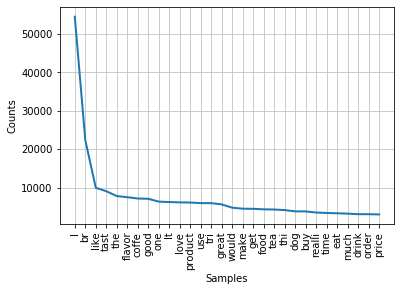

AxesSubplot(0.125,0.125;0.775x0.755)


In [83]:
print(freq1.plot(30))

In [24]:
sorted_freq2

[('good', 1095),
 ('coffe', 1003),
 ('tast', 843),
 ('love', 773),
 ('product', 697),
 ('dog', 688),
 ('great', 671),
 ('best', 634),
 ('tea', 600),
 ('flavor', 599),
 ('like', 446),
 ('food', 433),
 ('treat', 408),
 ('price', 367),
 ('favorit', 355),
 ('ever', 338),
 ('chip', 262),
 ('snack', 257),
 ('stuff', 250),
 ('delici', 225),
 ('chocol', 212),
 ('cup', 209),
 ('hot', 206),
 ('tasti', 205),
 ('cat', 197),
 ('mix', 193),
 ('better', 188),
 ('sweet', 188),
 ('buy', 188),
 ('free', 183),
 ('cooki', 182),
 ('qualiti', 170),
 ('littl', 164),
 ('healthi', 153),
 ('bad', 148),
 ('drink', 138),
 ('much', 130),
 ('one', 129),
 ('babi', 122),
 ('organ', 120),
 ('use', 118),
 ('get', 114),
 ('cracker', 114),
 ('work', 113),
 ('altern', 112),
 ('blend', 112),
 ('eat', 112),
 ('valu', 109),
 ('realli', 103),
 ('salt', 102),
 ('sugar', 101),
 ('soda', 101),
 ('way', 100),
 ('make', 100),
 ('easi', 98),
 ('cocoa', 98),
 ('tri', 97),
 ('sauc', 96),
 ('gluten', 96),
 ('yummi', 95),
 ('breakfast'

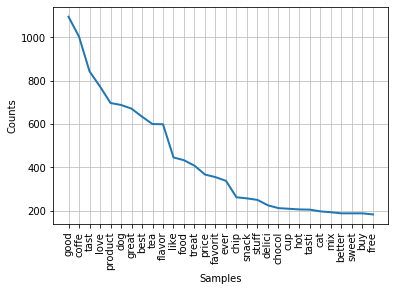

AxesSubplot(0.125,0.125;0.775x0.755)


In [27]:
print(freq2.plot(30))

## Bi-gram Bow

In [28]:
from nltk.util import ngrams

In [37]:
bigrams1=list(ngrams(stem1,2))
freq3=FreqDist(bigrams1)
sorted_freq3=sorted(freq3.items(),key=lambda k:k[1], reverse=True)
sorted_freq3

[(('br', 'br'), 9004),
 (('tast', 'like'), 1121),
 (('peanut', 'butter'), 708),
 (('highli', 'recommend'), 699),
 (('groceri', 'store'), 593),
 (('gluten', 'free'), 563),
 (('tast', 'great'), 508),
 (('tast', 'good'), 504),
 (('cup', 'coffe'), 500),
 (('dog', 'food'), 480),
 (('realli', 'like'), 478),
 (('much', 'better'), 406),
 (('dog', 'love'), 401),
 (('year', 'old'), 367),
 (('hot', 'chocol'), 349),
 (('realli', 'good'), 339),
 (('green', 'mountain'), 317),
 (('would', 'recommend'), 308),
 (('first', 'time'), 302),
 (('green', 'tea'), 290),
 (('great', 'tast'), 282),
 (('great', 'product'), 282),
 (('flavor', 'coffe'), 274),
 (('year', 'ago'), 273),
 (('would', 'buy'), 259),
 (('babi', 'food'), 253),
 (('potato', 'chip'), 249),
 (('subscrib', 'save'), 246),
 (('earl', 'grey'), 242),
 (('pork', 'rind'), 241),
 (('pretti', 'good'), 240),
 (('give', 'tri'), 236),
 (('look', 'like'), 234),
 (('local', 'store'), 234),
 (('wolfgang', 'puck'), 227),
 (('dark', 'chocol'), 226),
 (('dog', 

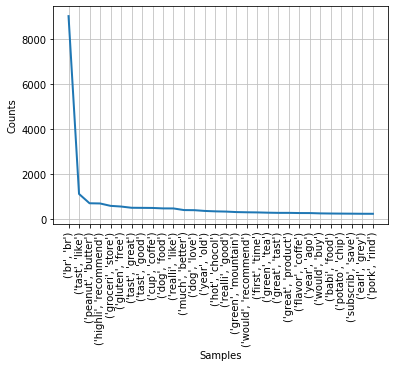

AxesSubplot(0.125,0.125;0.775x0.755)


In [38]:
print(freq3.plot(30))

In [39]:
bigrams2=list(ngrams(stem2,2))
freq4=FreqDist(bigrams2)
sorted_freq4=sorted(freq.items(),key=lambda k:k[1], reverse=True)
sorted_freq4

[(('dog', 'love'), 173),
 (('dog', 'food'), 117),
 (('coffe', 'coffe'), 88),
 (('gluten', 'free'), 83),
 (('great', 'price'), 74),
 (('dog', 'treat'), 74),
 (('cup', 'coffe'), 70),
 (('hot', 'chocol'), 66),
 (('tea', 'tea'), 64),
 (('tast', 'good'), 59),
 (('k', 'cup'), 57),
 (('treat', 'dog'), 55),
 (('pork', 'rind'), 52),
 (('peanut', 'butter'), 51),
 (('love', 'love'), 50),
 (('tast', 'great'), 49),
 (('flavor', 'coffe'), 49),
 (('love', 'dog'), 48),
 (('food', 'dog'), 45),
 (('green', 'tea'), 44),
 (('tast', 'like'), 44),
 (('coffe', 'good'), 43),
 (('hot', 'cocoa'), 43),
 (('coffe', 'ever'), 42),
 (('cat', 'love'), 41),
 (('product', 'great'), 40),
 (('tast', 'coffe'), 40),
 (('cat', 'food'), 39),
 (('good', 'good'), 39),
 (('earl', 'grey'), 39),
 (('babi', 'food'), 39),
 (('good', 'price'), 38),
 (('good', 'coffe'), 38),
 (('good', 'tast'), 38),
 (('great', 'product'), 37),
 (('great', 'tast'), 34),
 (('best', 'coffe'), 32),
 (('good', 'product'), 32),
 (('coffe', 'great'), 32),


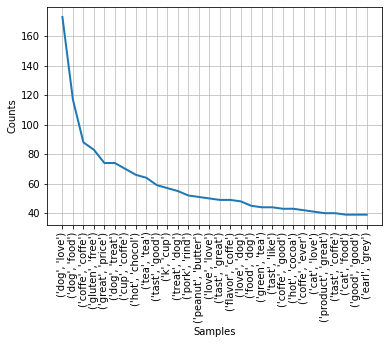

AxesSubplot(0.125,0.125;0.775x0.755)


In [40]:
print(freq4.plot(30))

## Tri-gram Bow on Summary

In [43]:
trigram1=list(ngrams(stem2,3))
freq5=FreqDist(trigram1)
sorted_freq5=sorted(freq5.items(),key=lambda k:k[1], reverse=True)
sorted_freq5

[(('dog', 'love', 'dog'), 30),
 (('dog', 'food', 'dog'), 27),
 (('love', 'dog', 'love'), 19),
 (('coffe', 'great', 'price'), 18),
 (('microwav', 'pork', 'rind'), 16),
 (('food', 'dog', 'food'), 15),
 (('product', 'great', 'price'), 14),
 (('treat', 'dog', 'love'), 12),
 (('food', 'dog', 'love'), 11),
 (('big', 'easi', 'bold'), 11),
 (('chocol', 'chip', 'cooki'), 10),
 (('earl', 'grey', 'tea'), 10),
 (('product', 'dog', 'love'), 10),
 (('coffe', 'best', 'coffe'), 10),
 (('coffe', 'coffe', 'coffe'), 10),
 (('k', 'cup', 'coffe'), 10),
 (('mountain', 'breakfast', 'blend'), 10),
 (('dog', 'love', 'treat'), 9),
 (('treat', 'dog', 'treat'), 9),
 (('favorit', 'k', 'cup'), 9),
 (('good', 'cup', 'coffe'), 9),
 (('tea', 'great', 'price'), 8),
 (('tea', 'favorit', 'tea'), 8),
 (('tast', 'coffe', 'coffe'), 8),
 (('hot', 'chocol', 'ever'), 8),
 (('best', 'coffe', 'ever'), 8),
 (('newman', 'organ', 'dog'), 8),
 (('organ', 'dog', 'food'), 8),
 (('medium', 'roast', 'coffe'), 8),
 (('treat', 'treat', 'd

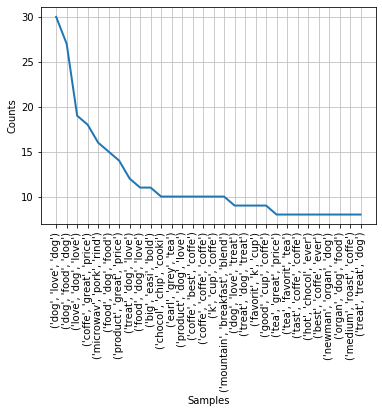

AxesSubplot(0.125,0.125;0.775x0.755)


In [44]:
print(freq5.plot(30))

## Upvote metrics

In [93]:
import seaborn as sns

datau=pd.read_csv('Reviews2.csv')
datau=datau.head(20000)

In [94]:
datau.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1, 'How helpful users find among user scores')

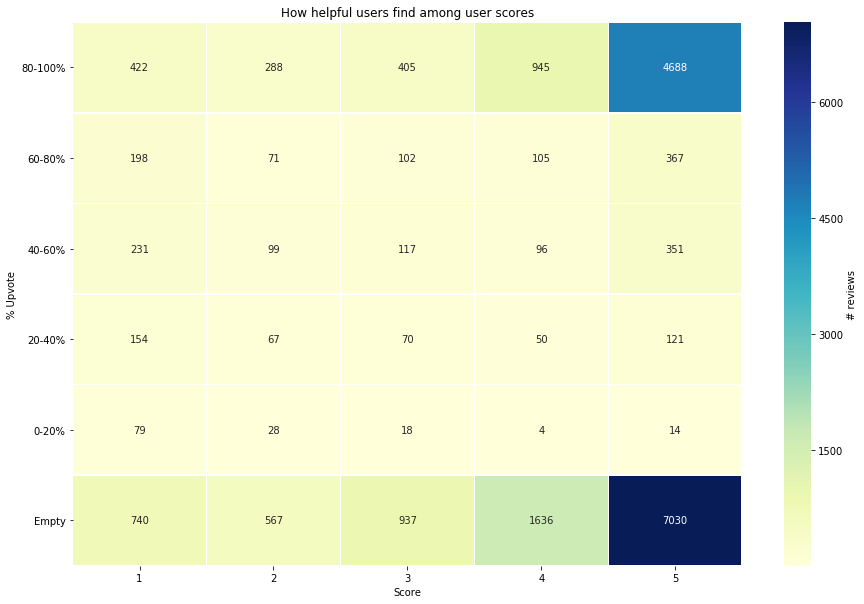

In [8]:
datau['Helpful %'] = np.where(datau['HelpfulnessDenominator'] > 0, datau['HelpfulnessNumerator'] / datau['HelpfulnessDenominator'], -1)
datau['% Upvote'] = pd.cut(datau['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)

df_s = datau.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt='d',cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')


# Sentiment Analysis

### Create sentiment tag

In [17]:
data['Sentiment']=data['Score'].map(lambda x:(x<3 and 'NEG') or (x==3 and 'NEU') or (x>3 and 'POS') )

data.Text=data.Text.str.lower()
data.Summary=data.Summary.str.lower()
# punctuation already removed during tokenization

data

,Score,Summary,Text,Sentiment
0,5,good quality dog food,i have bought several of the vitality canned d...,POS
1,1,not as advertised,product arrived labeled as jumbo salted peanut...,NEG
2,4,"""delight"" says it all",this is a confection that has been around a fe...,POS
3,2,cough medicine,if you are looking for the secret ingredient i...,NEG
4,5,great taffy,great taffy at a great price. there was a wid...,POS
...,...,...,...,...
19995,4,crispy and tart,deep river salt & vinegar chips are thick and ...,POS
19996,5,exceeded my expectations. one of the best chip...,i was very skeptical about buying a brand of c...,POS
19997,5,"awesome goodness! (deep river kettle chips, sw...",before you turn to other name brands out there...,POS
19998,3,"pretty good, but prefer other jalapeno chips","i was expecting some ""serious flavor"" as it wa...",NEU


### Partition

In [18]:
from sklearn.model_selection import train_test_split
training,test= train_test_split(data,test_size=0.3,random_state=30)
train_x=training.Text
train_y=training.Sentiment

test_x=test.Text
test_y=test.Sentiment

## Bag of Words

In [19]:
vector=CountVectorizer()
train_x_v=vector.fit_transform(train_x)

In [20]:
test_x_v=vector.transform(test_x)

## 4 Basic Classifier

### 1.Linear SVM

In [21]:
from sklearn import svm
from sklearn.svm import SVC

c_svm=svm.SVC(kernel='linear')

In [22]:
c_svm.fit(train_x_v,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 2.Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

c_dt=DecisionTreeClassifier()
c_dt.fit(train_x_v,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 3.Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

c_nb=GaussianNB()
c_nb.fit(train_x_v.toarray(),train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### 4.Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

c_lg=LogisticRegression()
c_lg.fit(train_x_v,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluation on 4 Basic Classifier

### Mean Accuracy

In [58]:
c_svm.score(test_x_v,test_y)

0.8188333333333333

In [59]:
c_dt.score(test_x_v,test_y)

0.7496666666666667

In [60]:
c_nb.score(test_x_v.toarray(),test_y)
#A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

0.4881666666666667

In [61]:
c_lg.score(test_x_v,test_y)

0.8368333333333333

### F1 Score

In [62]:
f1_score(test_y,c_svm.predict(test_x_v),average=None,labels=['POS','NEU','NEG'])

array([0.90668673, 0.31397849, 0.62217195])

In [63]:
f1_score(test_y,c_dt.predict(test_x_v),average=None,labels=['POS','NEU','NEG'])

array([0.86074341, 0.21382289, 0.41079093])

In [64]:
f1_score(test_y,c_nb.predict(test_x_v.toarray()),average=None,labels=['POS','NEU','NEG'])

array([0.64734673, 0.14075724, 0.25916625])

In [65]:
f1_score(test_y,c_lg.predict(test_x_v),average=None,labels=['POS','NEU','NEG'])

array([0.9171006 , 0.2916129 , 0.62230437])

## Adjustments on 2 well performed models

### SVM on TFIDF + ngram

In [23]:
tfidf=TfidfVectorizer(ngram_range=(1,2),stop_words='english')
#After adding ngram parameters, the model will recognize phrase containing two words such as 'not good'.

train_x_v2=tfidf.fit_transform(train_x)
test_x_v2=tfidf.transform(test_x)

In [24]:
c_svm.fit(train_x_v2,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
c_svm.score(test_x_v2,test_y)

0.8481666666666666

In [69]:
f1_score(test_y,c_svm.predict(test_x_v2),average=None,labels=['POS','NEU','NEG'])

array([0.91656614, 0.18374558, 0.64333782])

### Logistic Regression on TFIDF + ngram

In [46]:
c_lg.fit(train_x_v2,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
c_lg.score(test_x_v2,test_y)

0.811

In [72]:
f1_score(test_y,c_lg.predict(test_x_v2),average=None,labels=['POS','NEU','NEG'])

array([0.8934236 , 0.02772277, 0.41558442])

## Get features with modified SVM model

### Remove Neural reviews (score=3)

In [72]:
df = data[data['Score'] != 3]
X = df['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_dict)
#convert scores to binary values

In [64]:
df.head(5)

,Score,Summary,Text,Sentiment
0,5,good quality dog food,i have bought several of the vitality canned d...,POS
1,1,not as advertised,product arrived labeled as jumbo salted peanut...,NEG
2,4,"""delight"" says it all",this is a confection that has been around a fe...,POS
3,2,cough medicine,if you are looking for the secret ingredient i...,NEG
4,5,great taffy,great taffy at a great price. there was a wid...,POS


### Get Top 20 keywords

In [71]:
 w = tfidf.get_feature_names()
coef = c_lg.coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])

print('\033[1m'+'-Top 20 positive-')
print('\033[0m'+coeff_df.head(20).to_string(index=False))
print('')       
print('\033[1m'+'-Top 20 negative-')        
print('\033[0m'+coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
      Word  Coefficient
     great     7.463708
      love     5.479412
      best     5.157277
      good     4.209501
 delicious     3.861494
   perfect     3.520197
  favorite     3.302503
     loves     3.259273
 excellent     3.193857
      nice     3.175508
 wonderful     2.846829
    highly     2.517534
      easy     2.470354
     tasty     2.448834
       use     2.268622
    smooth     2.204692
     snack     2.130107
    stores     2.098652
   amazing     2.095140
     fresh     2.062893

-Top 20 negative-
          Word  Coefficient
           box    -2.441709
            ok    -2.483064
         maybe    -2.643688
         waste    -2.657401
          weak    -2.739020
 disappointing    -2.765966
       product    -2.779373
        return    -2.966595
         awful    -2.972063
      terrible    -3.035483
          didn    -3.106078
      horrible    -3.121627
          away    -3.228398
           did    -3.265390
         worst    -3.278246
         ch

## New Classifier: XGBoost

In [11]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score

In [25]:
num_round = 100
c_xgb =XGBClassifier(max_depth=2, learning_rate=1, n_estimators=num_round, 
                   silent=True, objective='binary:logistic')
c_xgb.fit(train_x_v2, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1, verbosity=1)

In [124]:
train_preds = c_xgb.predict(train_x_v2)
train_accuracy = accuracy_score(train_y, train_preds)
print ("Train Accuary: %.2f%%" % (train_accuracy * 100.0))

preds = c_xgb.predict(test_x_v2)
test_accuracy = accuracy_score(test_y, preds)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))


Train Accuary: 89.56%
Test Accuracy: 82.42%


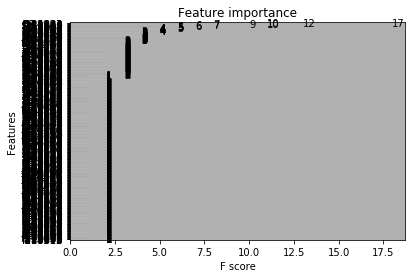

In [126]:
from matplotlib import pyplot

plot_importance(c_xgb)#feature importance
pyplot.show()


# Tuning

In [129]:
from sklearn.model_selection import GridSearchCV

## Grid Search on SVM

In [134]:
best_score = 0
for gamma in [0.001,0.01,1,10,100]:
    for c in [0.001,0.01,1,10,100]:
        # train on every possible arrangement
        c_svm = SVC(gamma=gamma,C=c)
        c_svm.fit(train_x_v2,train_y)
        score = c_svm.score(test_x_v2,test_y)
        
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,"C":c}
 
print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))

Best socre:0.85
Best parameters:{'gamma': 0.01, 'C': 100}


## Additional: Cross Validation on KFold

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [87]:
feature_set =train_x_v2
knn=KNeighborsClassifier(n_neighbors=5)

scores=cross_val_score(knn,feature_set,train_y, cv=5, scoring='accuracy')
scores

array([0.76436987, 0.77400928, 0.76642857, 0.77063237, 0.76670239])

### Pattern

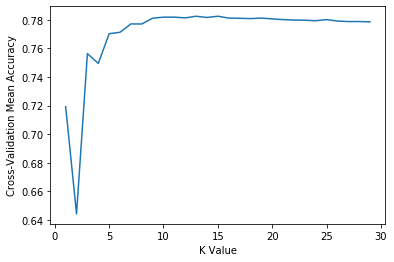

In [95]:
k_range=range(1,30)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,feature_set,train_y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Mean Accuracy')
plt.show()

# Save Model

In [ ]:
import pickle

with open(',/models/textanalytics_amazon.pkl','wb') as f:
    pickle.dump(clf, f)
    
# load model if needed